## Week 6: Linear Time-Invariant Systems

Last week, we discussed the inhomogeneous Poisson model and how it can represent a point process that has a probability distribution that only depends on an underlying **rate** or **intensity**.

This week, we'll discuss how to model the rate as a function of an external stimulus.

Follow along in the notebook during the lecture, and then work on the cells marked **Q** with help from your instructor. Submit the completed notebook to Collab.


### Readings

Before coming to class, you should have finished reading Chapter 2 in Dayan and Abbott.

For a more in-depth treatment, consult the following papers:

- Aljadeff et al. Analysis of Neuronal Spike Trains, Deconstructed. Neuron. [doi:10.1016/j.neuron.2016.05.039](https://doi.org/10.1016/j.neuron.2016.05.039)
- Touryan and Dan. Analysis of sensory coding with complex stimuli. Curr Opin Neurobiol [doi:10.1016/S0959-4388(00)00232-4](https://doi.org/10.1016/S0959-4388(00)00232-4)
- Schwartz et al. Spike-triggered neural characterization. J Vis [doi:10.1167/6.4.13](https://doi.org/10.1167/6.4.13)


In [1]:
# load matplotlib inline mode
%matplotlib inline

# import some useful libraries
import numpy as np                # numerical analysis linear algebra
import matplotlib.pyplot as plt   # plotting

## Neurons are integrators

Biological neurons may receive synaptic inputs from thousands of other cells.

<img src="images/l6_purkinje.png" alt="Purkinje cell" style="width: 300px;"/>

Synapses can be excitatory or inhibitory, and can vary in strength.

Roughly speaking, the neuron sums up these inputs and decides whether to spike. Its firing rate is therefore a function of the firing rates of its inputs.

## The linear neuron model

We can conceptualize this process as a **weighted sum** of the inputs.

![linear neuron](images/l6_linear_neuron.png)

In equation form, the diagram above looks like:

$$y = \sum_{i=0}^{N-1} w_i x_i$$

For now, we are not going to think about spikes, but about rates. The symbols in this equation mean:

- $x_i$ : the rate of presynaptic neuron $i$
- $w_i$ : the synaptic weight of neuron $i$
- $y$ : the output rate

Note that this weighted sum is equivalent to the [dot product](https://en.wikipedia.org/wiki/Dot_product) of the vector of weights, $\mathbf{w}$, with the vector of input rates, $\mathbf{x}$.

## Linear sensory models

It's quite difficult to know or control the firing rates of all the neurons that might be providing inputs to our target neuron. However, if we're recording from a living animal, we can control the stimulus. So for sensory neurons, without any loss of generality, we can think of the inputs to our model as dimensions of a stimulus. For a visual stimulus, this would be the individual pixels of an image:

We can also think of the inputs to our model neuron as corresponding to dimensions of a stimulus.

<img src="images/mnist-input.png" alt="visual perceptron" style="width: 500px;"/>

That is, the value of $x_i$ would correspond to the intensity of the image at pixel $i$, and the whole image would be represented as an $N$-dimensional vector $\mathbf{x} = (x_1, x_2, \ldots, x_N)$.

As before, the output rate of the target neuron, $y$ is simply a weighted sum over the pixels of the image.

However, biological neurons are firmly embedded in the physical world, and one consequence is that they are responding to events that happened in the past. That is, they have a **memory**.

How do we incorporate time into the model?

## Linear time-invariant (LTI) systems

A simple approach is to allow some of the inputs to be delayed or **lagged**.

Let's consider the case of a univariate input $x(t)$, with time discretized over some interval $\Delta t$.

If each input corresponds to an increasing delay, then:

$$y(t) = \sum_{i=0}^\infty x(t - i\cdot\Delta t) w_i$$

At time $t$, $w_0$ is the weight of the input at $t$, $w_1$ is the weight of the input at $t - \Delta t$, and so forth.

This should remind you of the basic formula for a linear neuron model, but instead of $i$ indexing different dimensions of the stimulus (or different synapses), it indexes past moments in time.

If the weights $w_i$ remain constant, this model is an example of a **linear**, **time-invariant** system.

## Properties of LTI systems

Consider a dynamical system with input x(t) and output y(t).

![dynamical system](images/l6_dynamical_system.png)

The system is linear if it obeys the laws of superposition and scaling. That is, if

\begin{align}
a(t) & \rightarrow b(t) \\
c(t) & \rightarrow d(t)
\end{align}

Then the following must be true:

\begin{align}
\alpha a(t) & \rightarrow \alpha b(t) \\
\alpha a(t) + \beta c(t) & \rightarrow \alpha b(t) + \beta d(t)
\end{align}

Furthemore, for the system to be time-invariant, shifting the input in time will lead to the same output, shifted in time by an equal amount:

\begin{align}
a(t + \Delta) & \rightarrow b(t + \Delta)
\end{align}

### Impulse Response Functions

How can we characterize the transformation that occurs between the input and output of an LTI system?

It turns out, we only need to know one thing: the system's **impulse response function**. This is the response you would obtain to a small pulse of unit amplitude, $\delta(t) \rightarrow h(t)$.

For example, here's the impulse response function of a tuning fork. When you hit it, it starts oscillating at 100 Hz and then decays (rather quickly, for illustration).

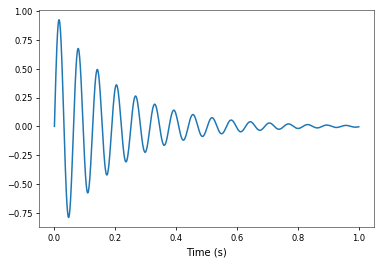

In [2]:
t = np.linspace(0.0, 1.0, 1000)
h = np.sin(100 * t) * np.exp(- 5 * t)
plt.plot(t, h)
plt.xlabel("Time (s)");

Once we know $h(t)$, we can compute the output $y(t)$ to **any** input $x(t)$. Why? Because any signal can be represented as a sum of time-shifted unit impulses of varying amplitude:

$$x(t) \equiv \sum_i \delta(t - \tau_i) x(\tau_i)$$

Recall that $\delta(t)$ is equal to $\infty$ at $t=0$, is zero everywhere else, and that the area under $\delta(t)$ is equal to 1. $\delta(t - \tau_i)$ simply shifts the impulse to $\tau_i$, and $x(\tau_i)$ scales it by the value of $x(t)$ at $t = \tau_i$. 

Although this equation seems trivial, it's the basis of **discretization** and an important operation called **convolution**.

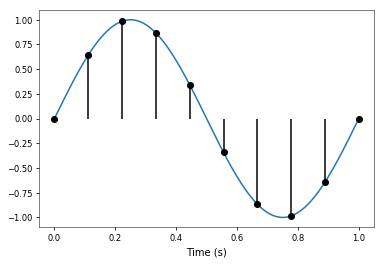

In [3]:
# NB: the python keyword `lambda` allows us to define simple functions inline
f = lambda t: np.sin(2 * np.pi * t)
plt.plot(t, f(t))
tau = np.linspace(0.0, 1.0, 10)
plt.vlines(tau, 0, f(tau))
plt.plot(tau, f(tau), 'ko')
plt.xlabel("Time (s)");

## Convolution

So how do we predict the response of our system from $h(t)$?

Because the system is time-invariant, we know the response to an impulse shifted by $\tau_i$ is just $h(t)$ shifted by the same amount:

\begin{align}
\delta(t - \tau_i) & \rightarrow h(t - \tau_i)
\end{align}

If this impulse is scaled by $x(\tau_i)$, then the output is scaled equally:

\begin{align}
x(\tau_i) \delta(t - \tau_i) & \rightarrow x(\tau_i) h(t - \tau_i)
\end{align}

Finally, because of superposition, if we add together many scaled, time-shifted impulses, the output is simply the sum of the scaled, time-shifted responses:

\begin{align}
\sum_i x(\tau_i) \delta(t - \tau_i) & \rightarrow \sum_i x(\tau_i) h(t - \tau_i)
\end{align}

So,

$$y(t) \equiv \sum_i h(t - \tau_i) x(\tau_i)$$

Here's an illustration for the sine function in the previous cell:

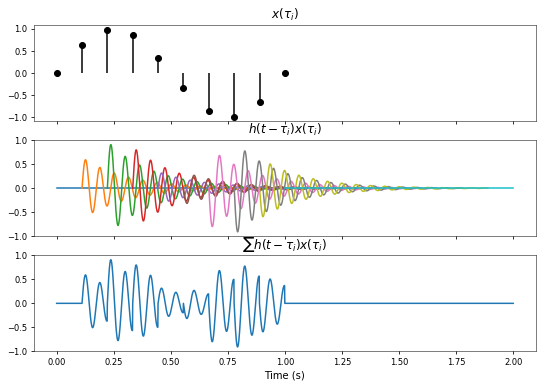

In [8]:
fig, axes = plt.subplots(nrows=3, ncols=1, sharex=True, figsize=(9, 6))
tot = np.zeros(t.size + h.size)
axes[0].vlines(tau, 0, f(tau))
axes[0].plot(tau, f(tau), 'ko')
axes[0].set_title(r"$x(\tau_i)$")
for tau_i in tau:
    hf = h * f(tau_i)
    axes[1].plot(t + tau_i, hf)
    idx = t.searchsorted(tau_i)
    tot[idx:idx+hf.size] = hf
axes[2].plot(np.linspace(0, 2.0, tot.size), tot)
axes[1].set_title(r"$h(t - \tau_i)x(\tau_i)$")
axes[2].set_title(r"$\sum h(t - \tau_i)x(\tau_i)$")
axes[2].set_xlabel("Time (s)");

Notice how constructive and destructive interference produces a rather complex pattern.

**Q** Why does the signal go to zero after 1.0 seconds?

### Convolution (II)

As the spacing between samples becomes infinitesimally small, the convolution sum becomes an integral:

$$y(t) = \int_{-\infty}^\infty h(t - \tau) x(\tau) d\tau$$

The shorthand for convolution is $*$ : $y(t) = (h * t)(t)$

Convolution is commutative:

$$\sum_i h(t - \tau_i) x(\tau_i) = \sum_i h(\tau_i) x(t - \tau_i)$$

Convolution can be done in any domain.

One way of interpreting the convolution sum is that it tells us that the output is computed by taking a *weighted sum of the present and past input values*. We can see this by writing out the sum:

$$\sum_i h(\tau_i) x(t - \tau_i) = h(0)x(t) + h(1)x(t - 1) + \cdots$$

The system is **causal** if $h(\tau)$ is only greater than zero for $\tau \geq 0$.

In most physical systems, the impulse response decays away with time, so there is a point where we can consider $h(\tau)$ to be essentially zero and truncate the function.


Here are some visual illustrations of convolution from [Wikipedia](https://en.wikipedia.org/wiki/Convolution). Essentially you are taking one of the functions, flipping it in time, sliding it past the other function, and computing the area where the two functions overlap. Convolution is also called **filtering**.

![convolution_animation](images/l6_convolution_box.gif)

![convolution_diagram](images/l6_convolution_static.png)

## LTI neuron models

We now have our first model of how sensory neurons respond to stimuli.

In essense, we are representing the neuron as a linear filter that computes a weighted sum of the stimulus as it varies in time.

Although very simple, LTI models (and linear filters) can generate surprisingly complex behavior. The exercises in this notebook will help you explore some of this complexity.

## Model systems

We will investigate the properties of two different LTI models. Their impulse response functions are:

\begin{align}
h_1(t) & = 
\frac{t}{\tau_1^2} e^{(-t/\tau_1)} \\
h_2(t) & = 
\frac{t}{\tau_1^2} e^{(-t/\tau_1)} - \frac{t}{\tau_2^2} e^{(-t/\tau_2)}
\end{align}

Both filters are causal, so $h_1(t) = h_2(t) = 0$ for all $t < 0$.

Functions with the general form of $t \exp (-t)$ are called **alpha** functions. To get you started, I've defined a function that will generate alpha kernels for you:

In [9]:
def alpha(tau, duration, dt):
    """An alpha function kernel with time constant tau, scaled to 
    
    tau: the time constant of the kernel (in units of duration/dt)
    duration: the duration of the support for the kernel
    dt: the sampling interval of the kernel
    
    Returns a tuple (h(t), h(t))
    """
    t = np.arange(0, duration, dt)
    k = t / tau**2 * np.exp(-t / tau)
    return (k, t)

Notice that the function above returns a **tuple**. In Python, a tuple is a kind of list that can't be modified. You can unpack the tuple into separate variables when you call a function by using **deconstruction**, as illustrated in the code cell below:

In [10]:
h1, t = alpha(50, 1000, 1)

**1.** Let $\tau_1 = 50$ ms and $\tau_2 = 100$ ms. Plot $h_1(t)$ and $h_2(t)$ for $0 < t < 1000$ ms, with a time step of 1 ms.

**2.** Consider three input signals:

\begin{align}
s_1(t) & = \sin(2 \pi \omega_1 t) \\
s_2(t) & = \sin(2 \pi \omega_2 t) \\
s_3(t) & = \mathrm{sign}\; [s_1(t)]
\end{align}

Let $\omega_1 = 0.3$ Hz and $\omega_2 = 3$ Hz. For $s_3$, `sign` means that the value is 1.0 if $s_1(t) > 0$ and -1.0 if $s_1(t) \leq 0$.

Generate and plot 10 s of data for each signal, using a time step of 1 ms. Keep your time units consistent!

Hint: Use `plt.subplots` to generate a nice grid of plots (see above for examples)

Another hint: Don't reinvent the wheel! See if there's a numpy function that will compute `sign` for you.

**3.** Convolve $s_1$, $s_2$, and $s_3$ with the $h_1$ and $h_2$ impulse response functions and plot the results (i.e., do the convolution for each combination of signal and LTI model).

Hint: Use `np.convolve`.

What do you notice about the response amplitudes? What differences do you see between the outputs of the two filters?

**4.** Now let's consider a white noise input:

$$s_4(t) \sim N(0,1)$$

$N$ means that each sample is drawn from a normal distribution with mean 0 and standard deviation 1.0. (Hint: use `np.random.randn`)

Compute and plot $(h_1 * s_4)$ and $(h_2 * s_4)$, with $s_4(t)$ evaluated over a 10 s interval.

**5.** It's a bit hard to compare the results of the convolution in the time domain, so let's see what the spectrum looks like.

We'll discuss spectral analysis in some detail later in the course, but for now I've provided the code you need. Just change the variable names to match what you used in the previous question.

In [ ]:
from scipy import signal
freq, S3 = signal.welch(s4, nperseg=10000, fs=1000)
plt.plot(freq, S3, 'k:', label=r"$s_4$")
freq, H1S3 = signal.welch(h1s4, nperseg=10000, fs=1000)
plt.plot(freq, H1S3, label=r"$h_1 * s_4$")
freq, H2S3 = signal.welch(h2s4, nperseg=10000, fs=1000)
plt.plot(freq, H2S3, label=r"$h_2 * s_4$")
plt.xlim(0, 20)
plt.legend()
plt.xlabel("Frequency (Hz)");

What do you notice about the spectra? Do they seem noisy? You can get a better estimate of the power spectrum by generating a much longer $s_4(t)$ (say around 1000 s).

You can copy the code in the cell above to calculate and plot the spectra, but you'll need to write the code for generating the longer signals.

Now that we have a nice plot, describe the following:

- the shape of the spectrum for the input signal
- the shape of the spectra for the two convolutions

## Correlation

Is it possible to estimate the impulse response function from the output of an LTI system when then input is *not* an impulse?

Yes! The opposite operation of convolution is called **correlation** or **cross-correlation**

$$(a \star b)(t) = \sum_i a(t + \tau_i) b(t)$$

Notice how similar the definition is to that of convolution. However, there is a critical sign difference: in convolution the "sliding" function is inverted in time, in correlation it is not.

<img src="images/l6_correlation_static.png" alt="correlation_diagram" style="width: 300px;"/>


**6.** Compute and plot the correlation between $s_4(t)$ and $(s_4 * h_1)(t)$, and between $s_4(t)$ and $(s_4 * h_2)(t)$.

Use `np.correlate` with the argument `mode="same"`. Note that although *we* know $h_1$ and $h_2$ are causal, the correlation function does not. The output of `np.correlate` therefore contains both the causal ($t \geq 0$) and acausal ($t < 0$) components.

Try using 10 seconds of data first and then 100.

How do the outputs of the correlation compare to the original $h_1$ and $h_2$ kernels?

What happens if you reverse the order of the arguments to `correlate`?